In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Setup Complete
/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/test.csv


In [2]:
bike_data = pd.read_csv('/kaggle/input/bike-sharing-demand/train.csv')
bike_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
def pega_hora(row):
    row.datetime = int(row.datetime[11]+row.datetime[12])
    return row
bike_data.apply(pega_hora, axis='columns')
# não alterou a table original
new_bike_data = bike_data.apply(pega_hora, axis='columns')


In [4]:
bike_sorted = bike_data.sort_values(by='datetime',ascending=True)

In [5]:
new_bike_data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [6]:
test_bike_data = pd.read_csv('/kaggle/input/bike-sharing-demand/test.csv')
test_bike_data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [7]:
test_bike_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [8]:
#começo do randomflorest
y = new_bike_data['count']
new_bike_data_features = ['datetime','season','holiday','workingday','weather','temp','atemp','humidity','windspeed','casual','registered']
X = new_bike_data[new_bike_data_features]
y.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [9]:
from sklearn.tree import DecisionTreeRegressor

bike_model = DecisionTreeRegressor()
bike_model.fit(X, y)

DecisionTreeRegressor()

In [10]:
#testando diferentes modelos
from sklearn.metrics import mean_absolute_error

predicted_bike = bike_model.predict(X)
mean_absolute_error(y, predicted_bike)

0.0

In [11]:
#testando o test split
from sklearn.model_selection import train_test_split


train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

bike_model.fit(train_X, train_y)

val_predictions = bike_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

2.9544452608376193


In [12]:
# resultados obtidos a partir da otimização número de leaf nodes 
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

for max_leaf_nodes in [5, 50, 500, 3000, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  43
Max leaf nodes: 50  		 Mean Absolute Error:  11
Max leaf nodes: 500  		 Mean Absolute Error:  4
Max leaf nodes: 3000  		 Mean Absolute Error:  2
Max leaf nodes: 5000  		 Mean Absolute Error:  2


In [13]:
# resultados obtidos usando o RandomForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
bike_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, bike_preds))

1.2117083027185895


In [14]:
#XGboost
y = new_bike_data['count']
new_bike_data_features = ['datetime','season','holiday','workingday','weather','temp','atemp','humidity','windspeed','casual','registered']
X = new_bike_data[new_bike_data_features]
X_train, X_valid, y_train, y_valid = train_test_split(X, y)


from xgboost import XGBRegressor


#my_model = XGBRegressor()
#my_model.fit(X_train, y_train)
#melhorando os parâmetros
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)

from sklearn.metrics import mean_absolute_error

predictions = my_model.predict(X_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))



/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


Mean Absolute Error: 1.2536443937008737


In [15]:
y.describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

<AxesSubplot:xlabel='temp', ylabel='count'>

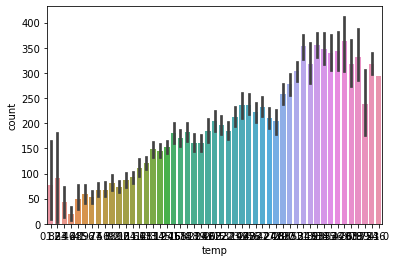

In [16]:
#firulas gráficas
sns.barplot(x=bike_data['temp'], y=bike_data['count'])

<AxesSubplot:xlabel='humidity', ylabel='count'>

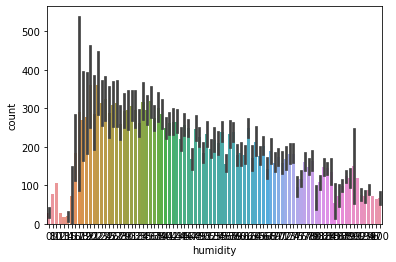

In [17]:
sns.barplot(x=bike_data['humidity'], y=bike_data['count'])

<AxesSubplot:xlabel='datetime', ylabel='count'>

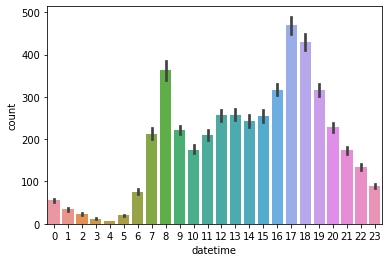

In [18]:
sns.barplot(x=new_bike_data['datetime'], y=bike_data['count'])